In [1]:
import pandas as pd
import numpy as np
import pickle
from Commen_Functions import get_score, get_score_df, merge_Results, load_sets

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
SETS = 1    
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/Merged_results.pkl', 'rb') as f:
    results_grid = pickle.load(f)
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/Merged_GridHDDC.pkl', 'rb') as f:
    bic_df = pickle.load(f)
with open(f'/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet{SETS}/MergedClustersHDDC.pkl', 'rb') as f:
    clustersHDDC = pickle.load(f)
# with open('/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet1/Merged_results.pkl', 'rb') as f:
#     results_grid = pickle.load(f)

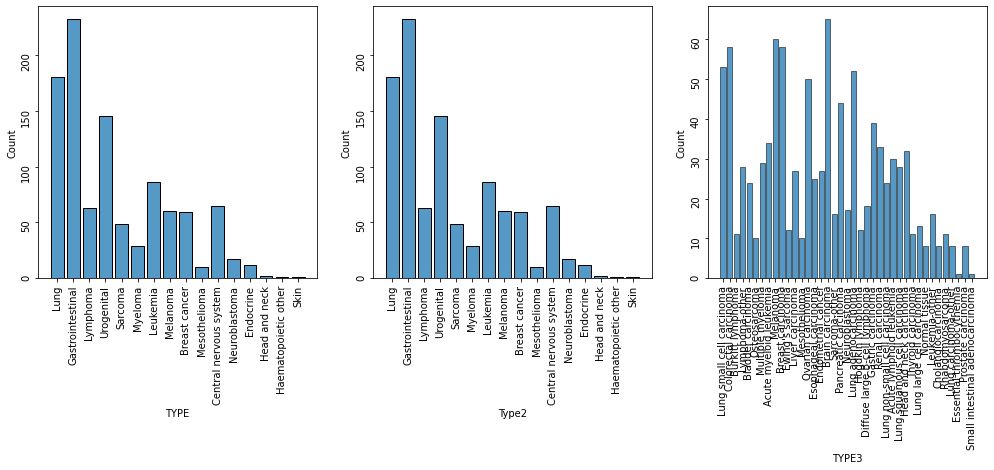

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
df, df_normalized, Type_df = load_sets(1)
fig, (ax1, ax2, ax3) = plt.subplots(1,3 ,figsize=(17,5))
sns.histplot(data=df, x="TYPE", shrink=.8, ax=ax1)
ax1.tick_params(labelrotation=90)
sns.histplot(data=df, x="Type2", shrink=.8, ax=ax2)
ax2.tick_params(labelrotation=90)
sns.histplot(data=df, x="TYPE3", shrink=.8, ax=ax3)
ax3.tick_params(labelrotation=90)
plt.show()

In [4]:
df, df_normalized, Type_df = load_sets(2)

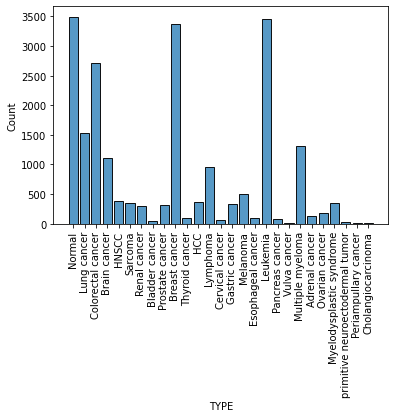

In [5]:
sns.histplot(data=df, x="TYPE", shrink=.8)
plt.xticks(rotation=90)
plt.show()

In [6]:
df, df_normalized, Type_df = load_sets(4)

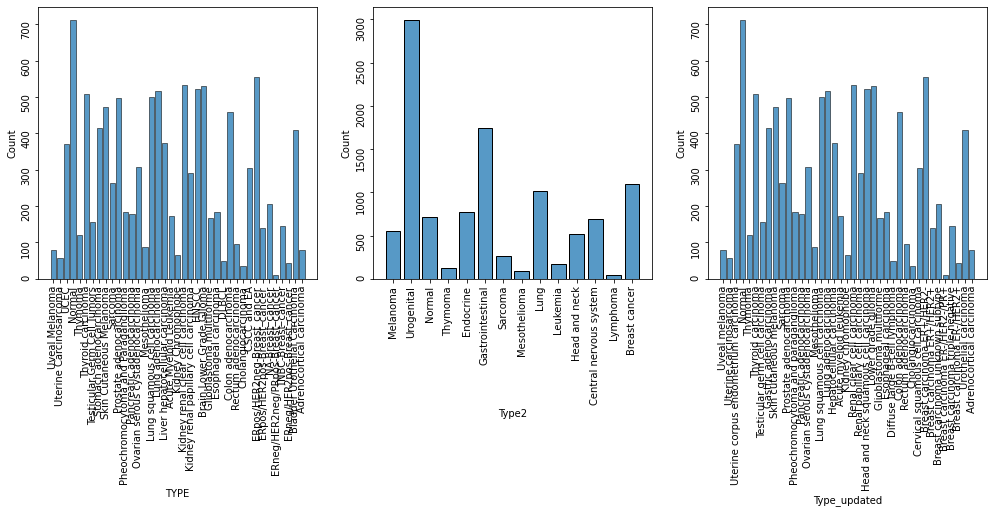

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3 ,figsize=(17,5))
sns.histplot(data=df, x="TYPE", shrink=.8, ax=ax1)
ax1.tick_params(labelrotation=90)
sns.histplot(data=df, x="Type2", shrink=.8, ax=ax2)
ax2.tick_params(labelrotation=90)
sns.histplot(data=df, x="Type_updated", shrink=.8, ax=ax3)
ax3.tick_params(labelrotation=90)
plt.show()

In [60]:
loads = [(1, 'TYPE', -3, 'CCLE'), (2, 'TYPE', -1, 'GPL570'), (4, 'Type2', -5, 'TCGA')]
for load in loads:
    df, df_normalized, Type_df = load_sets(load[0])
    temp_df = df.copy()
    try:
        temp_df.iloc[:,:load[2]] = df_normalized.values
    except AttributeError: 
        temp_df.iloc[:,:load[2]] = df_normalized
    for cancer_type, sub_df in temp_df.groupby(load[1]):
        sub_df = sub_df.select_dtypes([np.number])
        sub_df.to_csv(f'/data/g0017139/ICA_files/{load[3]}__Type_{cancer_type}.csv')



In [9]:
bic_df = bic_df.groupby('K').first().reset_index()
bic_df['K'] = bic_df['K'].astype('int')

results_grid['hddc'] = pd.merge(results_grid['hddc'], bic_df, left_on="n_clusters", right_on='K')

results_grid['hddc'] = results_grid['hddc'].sort_values('n_clusters')

ax = results_grid['hddc'].plot(x='n_clusters', y="silhouette_score_euclidean", legend=False)
results_grid['hddc'].plot(x='n_clusters', y="silhouette_score_correlation",color="y", legend=False, ax=ax)
results_grid['hddc'].plot(x='n_clusters', y="silhouette_score_manhattan",color="g", legend=False, ax=ax)
ax2 = ax.twinx()
results_grid['hddc'].plot(x="n_clusters", y="calinski_harabasz_score", ax=ax2, legend=False, color="r")
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.2))
results_grid['hddc'].plot(x="n_clusters", y="BIC", ax=ax3, legend=False, color="b")
ax.figure.legend(bbox_to_anchor=(1.2, 0.9), loc=2, borderaxespad=0.)
ax.set_ylabel("Silhouette score")
ax2.set_ylabel("Calinski score")
ax3.set_ylabel("BIC")

plt.show()

In [62]:
df, df_normalized, Type_df = load_sets(1)

In [63]:
from distinctipy import distinctipy
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def make_colors(df):
    cluster_colors = distinctipy.get_colors(max(15, len(set(df['Type']))),
                                colorblind_type='Deuteranomaly', n_attempts=10_000)
    cluster_colors = ['#%02x%02x%02x' % tuple((np.array(x)  * 250).astype(int)) for x in cluster_colors]

    color_mapper = dict(zip(set(df['Type']), cluster_colors))
    palette = []
    for key in sorted(color_mapper):
        palette.append(color_mapper[key])
    palette = sns.color_palette(palette)
    return cluster_colors, color_mapper, palette

In [64]:
def make_countplot(df, x, hue, pallete): 
    pallette = sns.set_palette(pallete)
    # Make the figure
    fig = plt.figure(figsize=(10,8))
    df = df.sort_values(hue)
    g = sns.countplot(x=x, hue=hue, palette=pallette, edgecolor=".6", 
                      data=df)
    g.get_legend().remove()
    g.set_title('Absoulte counts')
    
    fig2 = plt.figure(figsize=(12,8))
    counts = (df.groupby([hue])[x]
              .value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values(hue))
    g1 = sns.barplot(x=x, y="percentage", hue=hue,
                     data=counts, palette=pallette, edgecolor=".6")

    g1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    g1.set_title('Relative counts')
    return fig, fig2

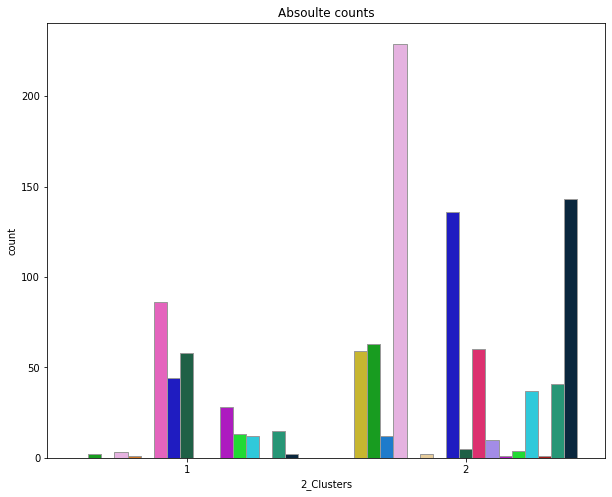

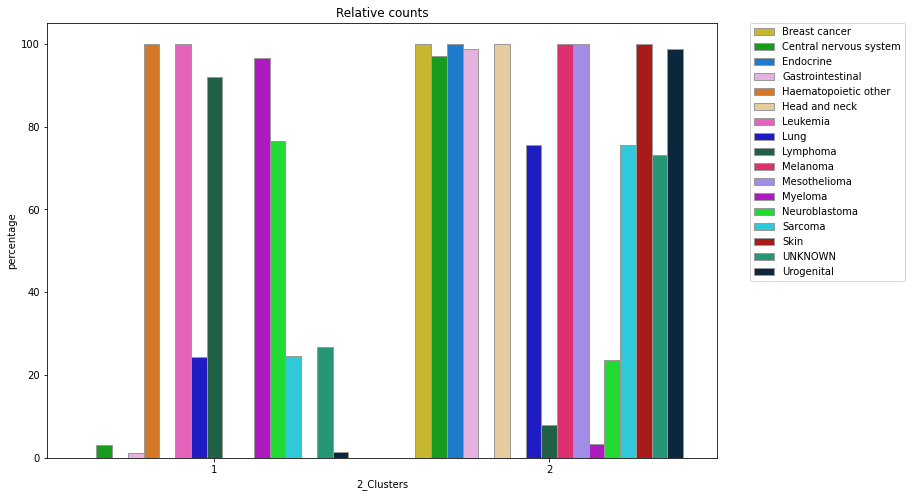

In [65]:
cluster_df = pd.read_csv("/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet1/HDDCClusters2.csv", index_col=0)
cluster_df.columns = ['2_Clusters']
cluster_df['Type'] = df['TYPE'].values
cluster_df = cluster_df.fillna('UNKNOWN')
cluster_colors, color_mapper, palette = make_colors(cluster_df)
make_countplot(cluster_df, '2_Clusters', 'Type', palette)
plt.show()

In [ ]:
Entrez_Map = pd.read_csv('/data/g0017139/Set1/Entrezid_mapping_using_org_Hs_eg_db_03052021.txt',
                               sep=None, engine='python', header=0,
)
Entrez_Map.sort_values(['CHR_Mapping', 'BP_Mapping'], axis=0, inplace=True)

In [195]:
eigenvectors = pd.read_csv("/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet1/eigenvec0clusters2.csv", index_col=0)
eigenvectors = eigenvectors.abs()
eigenvectors.index = df.columns[:-3]

In [196]:
Important_Genes = []
ids = []
for column in eigenvectors:
    value = eigenvectors.index[eigenvectors[column].argmax()]
    if value not in ids:
        ids.append(value)
    title = column.replace('X', 'Component ')
    Important_Genes.append((title,value))

important_genes = Entrez_Map[Entrez_Map['mapped_entrez_v1'].isin(ids)]
important_genes

,mapped_entrez_v1,CHR_Mapping,BP_startloc,BP_endloc,sense_or_antisense,GENENAME,SYMBOL,BP_Mapping
6001,3208,1,32886490.0,32894646.0,1,hippocalcin,HPCA,3.289057e+07
20444,4332,1,158831350.0,158849502.0,1,myeloid cell nuclear differentiation antigen,MNDA,1.588404e+08
21844,7399,1,215898418.5,216423422.0,-1,usherin,USH2A,2.161609e+08
22155,100302691,1,234629310.0,234634780.0,1,long intergenic non-protein coding RNA 184,LINC00184,2.346320e+08
16526,101929621,4,108557232.0,108560392.0,1,uncharacterized LOC101929621,LOC101929621,1.085588e+08
9519,6005,6,49605176.0,49636874.0,-1,Rh associated glycoprotein,RHAG,4.962102e+07
18927,101928461,6,136629113.0,136648198.0,1,uncharacterized LOC101928461,LOC101928461,1.366387e+08
19476,8676,6,144150516.0,144191939.0,1,syntaxin 11,STX11,1.441712e+08
15727,79037,7,100219247.0,100221488.0,1,PVR related immunoglobulin domain containing,PVRIG,1.002204e+08
12902,401,11,72239076.0,72244176.0,-1,paired like homeobox 2A,PHOX2A,7.224163e+07


In [197]:
print(' '.join(important_genes['SYMBOL'].astype(str).values))

HPCA MNDA USH2A LINC00184 LOC101929621 RHAG LOC101928461 STX11 PVRIG PHOX2A OTX2-AS1 TNFRSF17 ELAVL3 LIPI GATA1


In [202]:
Important_Genes

[('Component 1', 1995),
 ('Component 2', 608),
 ('Component 3', 79037),
 ('Component 4', 8676),
 ('Component 5', 6005),
 ('Component 6', 401),
 ('Component 7', 4332),
 ('Component 8', 2623),
 ('Component 9', 100302691),
 ('Component 10', 149998),
 ('Component 11', 149998),
 ('Component 12', 101929621),
 ('Component 13', 101928461),
 ('Component 14', 3208),
 ('Component 15', 100309464),
 ('Component 16', 7399)]

In [203]:
get_cols = [int(x) for x in ids]
get_cols.append('TYPE')

box_df = df[get_cols].copy()

box_df['Clusters'] = cluster_df['2_Clusters'].values

box_df = box_df.fillna('UNKNOWN')

In [204]:
box_df

,1995,608,79037,8676,6005,401,4332,2623,100302691,149998,101929621,101928461,3208,100309464,7399,TYPE,Clusters
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A01_436578.CEL,4.303095,3.430035,4.219573,3.752456,3.065144,3.603213,3.469382,3.856815,4.547971,3.397501,3.498937,3.900612,4.064536,3.588213,3.093636,Lung,2
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A02_436580.CEL,4.041496,3.375136,4.380404,3.565665,3.506877,4.043888,3.210143,3.984847,4.655717,3.275998,3.442281,4.277449,4.190668,3.820259,3.333500,Gastrointestinal,2
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A03_436582.CEL,10.306387,3.612511,4.555735,3.877749,3.190310,3.864747,3.354860,3.801144,4.901478,3.604694,3.676642,3.702944,7.492836,3.726193,3.249972,Lung,1
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A05_436586.CEL,4.165277,10.130797,9.153488,3.297708,3.096360,4.391037,3.454725,3.819965,4.341860,6.039655,3.400711,4.429698,4.460537,3.900486,3.353367,Lymphoma,1
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A06_436588.CEL,3.773930,5.405280,10.625098,7.770849,3.305009,4.155110,3.736358,4.166535,4.632816,3.546247,3.482214,4.014317,3.940268,3.551766,3.503947,Lymphoma,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H07_474624.CEL,3.839501,10.971782,10.457988,3.971169,3.189286,4.155235,3.626254,4.124386,4.797430,3.552982,3.691018,4.135296,3.961295,3.425027,3.458568,Lymphoma,1
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H09_474734.CEL,4.015776,3.619231,4.525394,3.921458,3.162629,4.341626,3.546338,3.825102,4.596980,3.483924,3.598544,3.820201,3.735283,3.581924,3.311877,Breast cancer,2
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H10_474614.CEL,3.807286,3.503746,4.062737,3.984658,3.005387,3.951503,3.619427,3.694151,4.476562,3.218961,3.570827,3.831956,3.567421,3.630691,3.262137,Endocrine,2
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H11_474690.CEL,4.206939,12.739731,4.521993,7.478963,3.202679,4.171048,3.272701,3.904346,4.680483,3.641782,3.437608,3.941704,3.963456,3.756582,3.320516,Myeloma,1


In [226]:
from scipy.stats import mannwhitneyu

def man_witney(df, genes):
    for x in genes:
        a = df[df['Clusters'] == 1][x[1]].values
        b = df[df['Clusters'] == 2][x[1]].values
        p = mannwhitneyu(a, b)[1]
        if p < 0.05:
            print(f'Gene \u001b[36m{x[1]}\x1b[0m has a p value of {p}')
        else:
            print(f'Gene {x[1]} has a p value of {p}')


In [227]:
from scipy.stats import mannwhitneyu
man_witney(box_df, Important_Genes)

Gene 1995 has a p value of 1.0617586040894356e-14
Gene 608 has a p value of 1.5045005131301989e-21
Gene 79037 has a p value of 7.101171770329413e-23
Gene 8676 has a p value of 1.0091544264056103e-15
Gene 6005 has a p value of 1.2572812426186652e-05
Gene 401 has a p value of 0.07559340685008391
Gene 4332 has a p value of 2.775654008229211e-07
Gene 2623 has a p value of 0.07113907154894276
Gene 100302691 has a p value of 0.023851943444342348
Gene 149998 has a p value of 0.0008481125874358118
Gene 149998 has a p value of 0.0008481125874358118
Gene 101929621 has a p value of 3.813550584980368e-11
Gene 101928461 has a p value of 0.032755197082677316
Gene 3208 has a p value of 0.003889669570253507
Gene 100309464 has a p value of 3.3574168586850707e-12
Gene 7399 has a p value of 1.391320712613715e-10


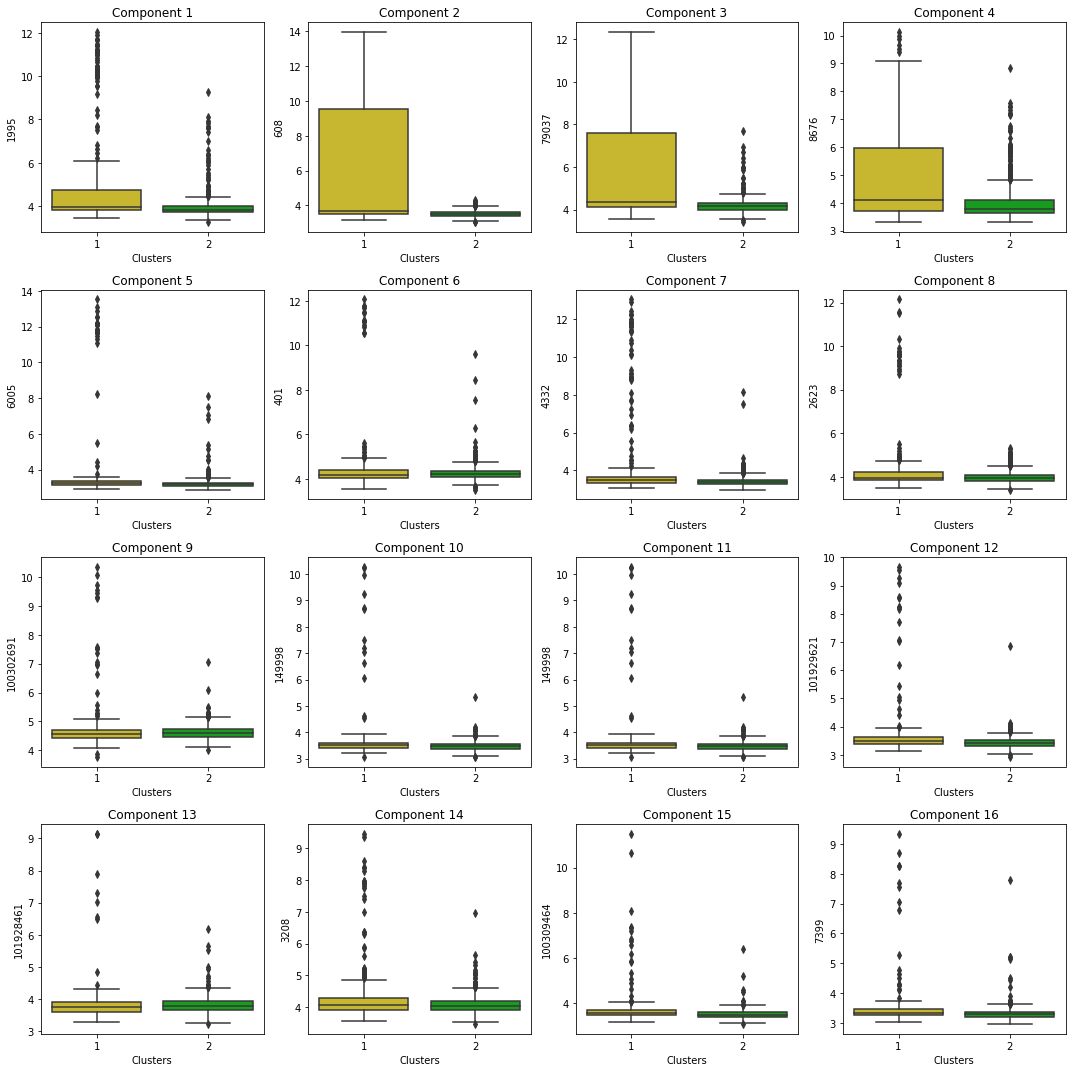

In [178]:

def make_boxplots(df, genes):
    size = len(genes) // 4
    if len(genes) % 4 != 0:
        size += 1
    fig, axs = plt.subplots(size,4, figsize=(15,15))
    i = 0
    axs = axs.ravel()
    for x in genes:
        sns.boxplot(x="Clusters", y=x[1], data=df,ax=axs[i])
        axs[i].set_title(x[0])
        i += 1
    fig.tight_layout()
make_boxplots(box_df, Important_Genes)

In [179]:
# man withney
# Log 

In [228]:
eigenvectors = pd.read_csv("/home/g0017139/UMCG_Thesis/Working_Code/Results/TSet1/eigenvec1clusters2.csv", index_col=0)
eigenvectors = eigenvectors.abs()
eigenvectors.index = df.columns[:-3]

In [229]:
Important_Genes = []
ids = []
for column in eigenvectors:
    value = eigenvectors.index[eigenvectors[column].argmax()]
    if value not in ids:
        ids.append(value)
    title = column.replace('X', 'Component ')
    Important_Genes.append((title,value))

important_genes = Entrez_Map[Entrez_Map['mapped_entrez_v1'].isin(ids)]
important_genes

,mapped_entrez_v1,CHR_Mapping,BP_startloc,BP_endloc,sense_or_antisense,GENENAME,SYMBOL,BP_Mapping
7909,64175,1,4.274633e+07,42767084.0,-1,prolyl 3-hydroxylase 1,P3H1,4.275671e+07
16651,79574,1,1.097501e+08,109764022.0,-1,EPS8 like 3,EPS8L3,1.097571e+08
20017,353135,1,1.527863e+08,152788425.0,1,late cornified envelope 1E,LCE1E,1.527873e+08
20119,10899,1,1.539743e+08,153977674.0,-1,jumping translocation breakpoint,JTB,1.539760e+08
20583,336,1,1.612223e+08,161223628.0,-1,apolipoprotein A2,APOA2,1.612230e+08
3191,7447,2,1.754040e+07,17656439.0,1,visinin like 1,VSNL1,1.759842e+07
15605,10190,2,9.931898e+07,99336333.0,-1,thioredoxin domain containing 9,TXNDC9,9.932766e+07
10089,7134,3,5.245109e+07,52454041.0,-1,"troponin C1, slow skeletal and cardiac type",TNNC1,5.245257e+07
21362,197,3,1.866130e+08,186621318.0,1,alpha 2-HS glycoprotein,AHSG,1.866172e+08
20348,26762,5,1.570294e+08,157058680.0,-1,hepatitis A virus cellular receptor 1,HAVCR1,1.570440e+08


In [230]:
print(' '.join(important_genes['SYMBOL'].astype(str).values))

P3H1 EPS8L3 LCE1E JTB APOA2 VSNL1 TXNDC9 TNNC1 AHSG HAVCR1 UMAD1 EVX1 ZNRF2 RPL13AP17 POLR2K ARNTL2 PFDN5 TMEM19 DTD2 ZFYVE26 TEDC2 ZNF207 TTR ZNF45 SCAF1 LAMA5-AS1 SOX10


In [231]:
important_genes

,mapped_entrez_v1,CHR_Mapping,BP_startloc,BP_endloc,sense_or_antisense,GENENAME,SYMBOL,BP_Mapping
7909,64175,1,4.274633e+07,42767084.0,-1,prolyl 3-hydroxylase 1,P3H1,4.275671e+07
16651,79574,1,1.097501e+08,109764022.0,-1,EPS8 like 3,EPS8L3,1.097571e+08
20017,353135,1,1.527863e+08,152788425.0,1,late cornified envelope 1E,LCE1E,1.527873e+08
20119,10899,1,1.539743e+08,153977674.0,-1,jumping translocation breakpoint,JTB,1.539760e+08
20583,336,1,1.612223e+08,161223628.0,-1,apolipoprotein A2,APOA2,1.612230e+08
3191,7447,2,1.754040e+07,17656439.0,1,visinin like 1,VSNL1,1.759842e+07
15605,10190,2,9.931898e+07,99336333.0,-1,thioredoxin domain containing 9,TXNDC9,9.932766e+07
10089,7134,3,5.245109e+07,52454041.0,-1,"troponin C1, slow skeletal and cardiac type",TNNC1,5.245257e+07
21362,197,3,1.866130e+08,186621318.0,1,alpha 2-HS glycoprotein,AHSG,1.866172e+08
20348,26762,5,1.570294e+08,157058680.0,-1,hepatitis A virus cellular receptor 1,HAVCR1,1.570440e+08


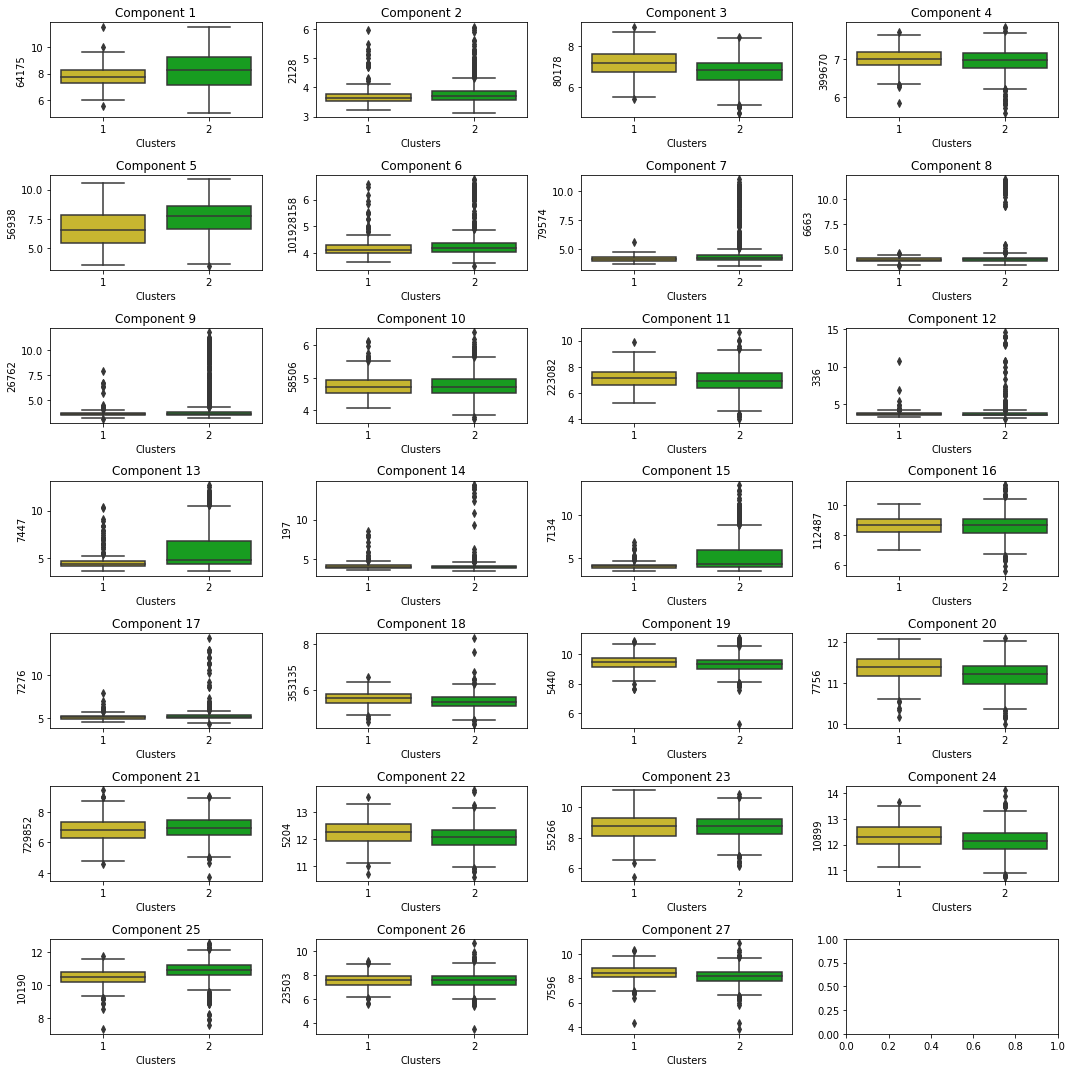

In [232]:
get_cols = [int(x) for x in ids]
get_cols.append('TYPE')

box_df = df[get_cols].copy()

box_df['Clusters'] = cluster_df['2_Clusters'].values

box_df = box_df.fillna('UNKNOWN')

make_boxplots(box_df, Important_Genes)

In [233]:
man_witney(box_df, Important_Genes)

Gene 64175 has a p value of 6.284220548340581e-06
Gene 2128 has a p value of 9.816905718619118e-06
Gene 80178 has a p value of 1.0443544254953306e-17
Gene 399670 has a p value of 0.0035496428479317647
Gene 56938 has a p value of 4.1903159750626503e-17
Gene 101928158 has a p value of 0.0002508040115627916
Gene 79574 has a p value of 9.174070962074025e-05
Gene 6663 has a p value of 0.01105513816897294
Gene 26762 has a p value of 0.030229370680699735
Gene 58506 has a p value of 0.655475430486457
Gene 223082 has a p value of 0.00043385434275245403
Gene 336 has a p value of 0.006699370341189233
Gene 7447 has a p value of 9.147086788458569e-21
Gene 197 has a p value of 0.0038528298505616475
Gene 7134 has a p value of 5.431238618210936e-20
Gene 112487 has a p value of 0.59821006706894
Gene 7276 has a p value of 0.0019394407152438806
Gene 353135 has a p value of 3.244086872894765e-12
Gene 5440 has a p value of 0.00039961005015799256
Gene 7756 has a p value of 4.962236292287736e-15
Gene 729852 